# outline


<p><a name="sections"></a></p>


## Sections

- <a href="#dyc">1. Data type convention</a><br>
    - <a href="#std">str to date</a><br>
    - <a href="#stn">str to numeric</a><br>
- <a href="#mv">2. Missing Values</a><br>
    - <a href="#mvi">Missing value imputation</a><br>
- <a href="#nf">3. Numerical features</a><br>
    - <a href="#skew">Skewness</a><br>
    - <a href="#outliers">Outliers</a><br>
    - <a href="#correlation">Correlation</a><br>
    - <a href="#vn">Visualization</a><br>
- <a href="#cf">4. Categorical features</a><br>
    - <a href="#vc">Visualization</a><br>
- <a href="#ts">5. Time Series Analysis</a><br>

In [50]:
#create environment
import numpy as np
import pandas as pd
import scipy as sci
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from copy import deepcopy
from statsmodels.formula.api import ols
import statsmodels.api as sm
from datetime import datetime
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', 500)

In [51]:
#import data
usjh_v1=pd.read_csv('./USJH_order_dataset_itemUnit.csv')
usjh_v2=pd.read_csv('./USJH_order_dataset_orderUnit.csv')
uno_inv=pd.read_csv('./UNO_inventory_item.csv')
uno_sale=pd.read_csv('./UNO_Sale_vs_RCVD.csv')

/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,30,31,35,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
#'Tax 3 Name' in usjh and 'ToWH' in uno_inv are pure missing values, drop them to avoid error
usjh_v1=usjh_v1.drop(['Unnamed: 0','Tax 3 Name'],axis=1)
usjh_v2=usjh_v2.drop(['Unnamed: 0','Tax 3 Name','Lineitem quantity','Lineitem price','Lineitem compare at price'],axis=1)
uno_inv=uno_inv.drop('ToWH',axis=1)

In [53]:
print('usjh_v1:',usjh_v1.shape)
print('usjh_v2:',usjh_v2.shape)
print('uno_inv:',uno_inv.shape)
print('uno_sale :',uno_sale.shape)

usjh_v1: (85925, 41)
usjh_v2: (3746, 34)
uno_inv: (144726, 7)
uno_sale : (111043, 20)


<p><a name="dyc"></a></p>
# 1.Data type convention

In [54]:
usjh_v1.dtypes

Name                            object
Financial Status                object
Paid at                         object
Fulfillment Status              object
Accepts Marketing               object
Currency                        object
Subtotal                       float64
Shipping                       float64
Taxes                          float64
Total                          float64
Discount Code                   object
Discount Amount                float64
Shipping Method                 object
Created at                      object
Lineitem quantity                int64
Lineitem name                   object
Lineitem price                 float64
Lineitem compare at price      float64
Lineitem sku                    object
Lineitem fulfillment status     object
Shipping Street                 object
Shipping Address1               object
Shipping Address2               object
Shipping Company                object
Shipping City                   object
Shipping Zip             

In [55]:
usjh_v2.dtypes

Name                            object
Financial Status                object
Paid at                         object
Fulfillment Status              object
Accepts Marketing               object
Currency                        object
Subtotal                       float64
Shipping                       float64
Taxes                          float64
Total                          float64
Discount Code                   object
Discount Amount                float64
Shipping Method                 object
Created at                      object
Lineitem fulfillment status     object
Shipping Street                 object
Shipping Address1               object
Shipping Address2               object
Shipping Company                object
Shipping City                   object
Shipping Zip                    object
Shipping Province               object
Shipping Country                object
Notes                           object
Note Attributes                 object
Cancelled at             

In [56]:
uno_inv.dtypes

STYLE#         object
COLOR          object
Description    object
LAST RCVD      object
Qty            object
On-Hand        object
CB Reason      object
dtype: object

In [57]:
uno_sale.dtypes

STYLE#             object
COLOR              object
DESCRIPTION        object
CUST #             object
INVC DATE          object
QTY                 int64
UNIT PRICE         object
EXT-AMT            object
REASON             object
IMPORT HANDMADE    object
MANUFACTORS        object
State_sold         object
ZIP_sold           object
RELEASED YEAR      object
Seasos             object
Season target      object
LAST RCVD          object
FIRST RCVD         object
LAST INVOICED      object
FIRST INVOICED     object
dtype: object

<p><a name="std"></a></p>
## object to date

In [58]:
#format='%m/%d/%y %H:%M'
def str_to_datetime(df, features):
    for feature in features:
        df[feature]=pd.to_datetime(df[feature], format='%m/%d/%y %H:%M')
    
#format='%m/%d/%y'
def str_to_date(df, features):
    for feature in features:
        df[feature]=pd.to_datetime(df[feature], format='%m/%d/%y')

#format='%m/%d/%Y'
def str_to_date1(df, features):
    for feature in features:
        df[feature]=pd.to_datetime(df[feature], format='%m/%d/%Y')

In [59]:
#date features in usjh dataset
usjh_v1_todate=['Paid at', 'Created at', 'Cancelled at']
usjh_v2_todate=['Paid at', 'Created at', 'Cancelled at']

In [60]:
#format='%m/%d/%y %H:%M'
str_to_datetime(usjh_v1,usjh_v1_todate)
str_to_datetime(usjh_v2,usjh_v2_todate)

In [61]:
#date features in uno dataset
uno_inv_todate=['LAST RCVD']
uno_sale_todate=['INVC DATE','LAST RCVD','FIRST RCVD','LAST INVOICED','FIRST INVOICED']

In [62]:
#some date in uno_sale are missing but shown as 'NO DATA', change them into missing values 
#to avoid problems
uno_sale[uno_sale_todate]=uno_sale[uno_sale_todate].replace('NO DATA',np.nan)

In [63]:
#format='%m/%d/%Y'
str_to_date1(uno_inv, uno_inv_todate)

In [64]:
#format='%m/%d/%y'

str_to_date(uno_sale, uno_sale_todate)

<p><a name="stn"></a></p>
## str to numeric

In [65]:
#str to numeric
def num(df, features):
    for feature in features:
        df[feature]=df[feature].replace('[$,() ]', '', regex=True).astype(float)

In [66]:
usjh_v1_tonum=[?]
usjh_v2_tonum=[?]

SyntaxError: invalid syntax (<ipython-input-66-2c2756da3f89>, line 1)

In [ ]:
uno_inv_tonum=['Qty','On-Hand']
uno_sale_tonum=['UNIT PRICE','EXT-AMT']

In [ ]:
num(uno_inv, uno_inv_tonum)

In [67]:
num(uno_sale, uno_sale_tonum)

In [68]:
uno_inv.dtypes

STYLE#                 object
COLOR                  object
Description            object
LAST RCVD      datetime64[ns]
Qty                    object
On-Hand                object
CB Reason              object
dtype: object

In [69]:
uno_sale.dtypes

STYLE#                     object
COLOR                      object
DESCRIPTION                object
CUST #                     object
INVC DATE          datetime64[ns]
QTY                         int64
UNIT PRICE                float64
EXT-AMT                   float64
REASON                     object
IMPORT HANDMADE            object
MANUFACTORS                object
State_sold                 object
ZIP_sold                   object
RELEASED YEAR              object
Seasos                     object
Season target              object
LAST RCVD          datetime64[ns]
FIRST RCVD         datetime64[ns]
LAST INVOICED      datetime64[ns]
FIRST INVOICED     datetime64[ns]
dtype: object

<p><a name="mv"></a></p>
# 2.Missing Values

In [70]:
#return missing value in a data frame
def missing_value(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
    nulls.columns=['NAs']
    nulls['percentage']=nulls['NAs']/df.shape[0]
    result=nulls.loc[nulls.NAs>0]
    print('Number of features with NAs:',result.shape[0])
    return result

## USJH

In [71]:
#item unit
missing_value(usjh_v1).head

Number of features with NAs: 33


<bound method NDFrame.head of                              NAs  percentage
Note Attributes            85922    0.999965
Tags                       85846    0.999081
Unnamed: 40                85781    0.998324
Cancelled at               85503    0.995089
Source                     82179    0.956404
Risk Level                 82179    0.956404
Unnamed: 39                81143    0.944347
Notes                      79393    0.923980
Paid at                    78989    0.919278
Lineitem compare at price  78875    0.917952
Shipping Address2          72157    0.839767
Discount Code              65979    0.767867
Lineitem sku               44653    0.519674
Color                      10031    0.116741
Shipping Province           5706    0.066407
Shipping Zip                4871    0.056689
Shipping Company            4767    0.055479
Refunded Amount             4739    0.055153
Payment Method              4739    0.055153
Shipping Country            4714    0.054862
Shipping City            

In [72]:
#order unit
missing_value(usjh_v2).head()

Number of features with NAs: 17


,NAs,percentage
Note Attributes,3745,0.999733
Cancelled at,3690,0.985051
Tags,3667,0.978911
Notes,3482,0.929525
Discount Code,3339,0.891351


## UNO

In [73]:
#inventory
missing_value(uno_inv)

Number of features with NAs: 6


,NAs,percentage
CB Reason,144725,0.999993
COLOR,8297,0.057329
Description,16,0.000111
On-Hand,1,0.000007
Qty,1,0.000007
LAST RCVD,1,0.000007


In [74]:
#sale
missing_value(uno_sale).head()

Number of features with NAs: 6


,NAs,percentage
REASON,108415,0.976333
FIRST RCVD,24490,0.220545
LAST RCVD,24490,0.220545
COLOR,3981,0.035851
MANUFACTORS,81,0.000729


<p><a name="mvi"></a></p>
# Missing value types and imputation

## Types

** Not Missing at Random (NMAR) : they should be replaced with 'None'**

In [75]:
def impu_nmar(df,features):
    df[features]=df[features].fillna('None')
    
def impu_nmar0(df,features):
    df[features]=df[features].fillna(0.0)

In [76]:
missing_value(usjh_v1).index

Number of features with NAs: 33


Index(['Note Attributes', 'Tags', 'Unnamed: 40', 'Cancelled at', 'Source',
       'Risk Level', 'Unnamed: 39', 'Notes', 'Paid at',
       'Lineitem compare at price', 'Shipping Address2', 'Discount Code',
       'Lineitem sku', 'Color ', 'Shipping Province', 'Shipping Zip',
       'Shipping Company', 'Refunded Amount', 'Payment Method',
       'Shipping Country', 'Shipping City', 'Shipping Street',
       'Shipping Address1', 'Shipping Method', 'Discount Amount', 'Total',
       'Currency', 'Fulfillment Status', 'Accepts Marketing', 'Taxes',
       'Shipping', 'Subtotal', 'Vendor'],
      dtype='object')

In [77]:
usjh_v1_nmar=['Note Attributes', 'Tags', #'Cancelled at',
       'Notes','Discount Code']
usjh_v1_nmar0=['Refunded Amount','Discount Amount']

In [78]:
impu_nmar(usjh_v1,usjh_v1_nmar)
impu_nmar0(usjh_v1,usjh_v1_nmar0)

In [79]:
missing_value(usjh_v1).head()

Number of features with NAs: 27


,NAs,percentage
Unnamed: 40,85781,0.998324
Cancelled at,85503,0.995089
Source,82179,0.956404
Risk Level,82179,0.956404
Unnamed: 39,81143,0.944347


In [80]:
missing_value(usjh_v2).index

Number of features with NAs: 17


Index(['Note Attributes', 'Cancelled at', 'Tags', 'Notes', 'Discount Code',
       'Shipping Address2', 'Paid at', 'Color ', 'Shipping Province', 'Vendor',
       'Shipping Method', 'Shipping Zip', 'Shipping Company',
       'Shipping Country', 'Shipping City', 'Shipping Street',
       'Shipping Address1'],
      dtype='object')

In [81]:
usjh_v2_nmar=['Note Attributes', 'Tags', 'Cancelled at',
       'Notes','Discount Code']

In [82]:
impu_nmar(usjh_v2,usjh_v2_nmar)

In [83]:
missing_value(usjh_v2).head()

Number of features with NAs: 12


,NAs,percentage
Shipping Address2,3010,0.803524
Paid at,2762,0.737320
Color,166,0.044314
Shipping Province,39,0.010411
Vendor,33,0.008809


In [84]:
missing_value(uno_inv).index

Number of features with NAs: 6


Index(['CB Reason', 'COLOR', 'Description', 'On-Hand', 'Qty', 'LAST RCVD'], dtype='object')

In [85]:
uno_inv_nmar=[?]

SyntaxError: invalid syntax (<ipython-input-85-8cabad2832b5>, line 1)

In [86]:
missing_value(uno_sale).index

Number of features with NAs: 6


Index(['REASON', 'FIRST RCVD', 'LAST RCVD', 'COLOR', 'MANUFACTORS',
       'DESCRIPTION'],
      dtype='object')

In [87]:
uno_sale_nmar=['REASON']

In [88]:
impu_nmar(uno_sale,uno_sale_nmar)

In [89]:
missing_value(uno_sale).index

Number of features with NAs: 5


Index(['FIRST RCVD', 'LAST RCVD', 'COLOR', 'MANUFACTORS', 'DESCRIPTION'], dtype='object')

<p><a name="nf"></a></p>
# 3. Explore numerical features

In [60]:
#create dataframe only consists of numerical values for each dataset
usjh1n=usjh_v1.select_dtypes(include='number')
usjh2n=usjh_v2.select_dtypes(include='number')
uno_in=uno_inv.select_dtypes(include='number')
uno_sn=uno_sale.select_dtypes(include='number')
print(usjh1n.shape)
print(usjh2n.shape)
print(uno_in.shape)
print(uno_sn.shape)

(85925, 9)
(3746, 7)
(144726, 2)
(111043, 3)


In [61]:
usjh1n.describe()

,Subtotal,Shipping,Taxes,Total,Discount Amount,Lineitem quantity,Lineitem price,Lineitem compare at price,Refunded Amount
count,81365.000000,81365.000000,81365.000000,81362.000000,85925.000000,85925.000000,85925.000000,7050.000000,85925.000000
mean,468.411290,7.836646,0.051450,476.303490,17.473226,2.202944,5.690933,9.655613,77.311024
std,643.559828,21.244518,0.932189,645.421718,53.302811,2.871572,17.570636,97.916576,158.711290
min,1.990000,0.000000,0.000000,7.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,195.000000,0.000000,0.000000,207.430000,0.000000,1.000000,3.250000,4.000000,13.300000
50%,302.000000,0.000000,0.000000,307.000000,0.000000,1.000000,4.500000,5.750000,42.000000
75%,497.090000,10.400000,0.000000,502.650000,0.000000,2.000000,6.250000,8.500000,86.490000
max,12770.250000,360.150000,40.470000,12770.250000,1039.800000,200.000000,3550.000000,3360.000000,4003.340000


In [62]:
usjh2n.describe()

,Subtotal,Shipping,Taxes,Total,Discount Amount,Refunded Amount,item_quantity
count,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000
mean,261.697023,8.735526,0.053540,270.486089,6.998062,41.888497,50.530699
std,413.581388,14.322096,0.877899,413.958494,37.542806,92.043439,79.453670
min,1.990000,0.000000,0.000000,7.500000,0.000000,0.000000,1.000000
25%,81.750000,0.000000,0.000000,93.755000,0.000000,0.000000,14.000000
50%,175.500000,9.830000,0.000000,188.200000,0.000000,20.250000,32.000000
75%,304.625000,10.570000,0.000000,308.447500,0.000000,53.495000,60.000000
max,12770.250000,360.150000,40.470000,12770.250000,1039.800000,4003.340000,2112.000000


In [63]:
uno_in.describe()

,Qty,On-Hand
count,144725.000000,144725.00000
mean,-3.070707,5.31271
std,163.276722,394.42100
min,-3514.000000,-15046.00000
25%,-36.000000,0.00000
50%,-12.000000,0.00000
75%,-12.000000,47.00000
max,10000.000000,10000.00000


In [64]:
uno_sn.describe()

,QTY,UNIT PRICE,EXT-AMT
count,111043.000000,111043.000000,111043.000000
mean,42.114478,3.651325,134.925883
std,104.190938,3.759360,303.436692
min,-3600.000000,0.000000,0.000000
25%,12.000000,2.500000,39.000000
50%,24.000000,3.500000,66.000000
75%,36.000000,4.500000,126.000000
max,3514.000000,821.730000,29875.500000


<p><a name="skew"></a></p>
## Skewness

In [65]:
def skewness(df):
    df=pd.DataFrame(df.skew(), columns=['skewness']).reset_index().sort_values('skewness', ascending=False)
    df.columns=['feature','skewness']
    return df

In [66]:
skewness(usjh1n).head()

,feature,skewness
6,Lineitem price,128.670216
2,Taxes,36.337078
7,Lineitem compare at price,34.107406
5,Lineitem quantity,14.389948
8,Refunded Amount,13.493993


In [67]:
skewness(usjh2n).head()

,feature,skewness
2,Taxes,33.105335
5,Refunded Amount,23.085487
4,Discount Amount,13.770346
0,Subtotal,13.256568
3,Total,13.245049


In [68]:
skewness(uno_in)

,feature,skewness
0,Qty,3.584425
1,On-Hand,-1.903742


In [69]:
skewness(uno_sn)

,feature,skewness
1,UNIT PRICE,135.429766
2,EXT-AMT,17.955845
0,QTY,10.028381


<p><a name="outlier"></a></p>
## Outliers

In [70]:
#define outliers are those values greater than 3*std
def outliers(df):
    outlier=(np.abs(df-df.mean()) > (3*df.std())).sum().to_frame().reset_index()
    outlier.columns=['feature','n_of_outliers']
    outlier=outlier.sort_values('n_of_outliers',ascending=False)
    
    sns.barplot(y='feature',x='n_of_outliers',data=outlier,orient='h')
    plt.rcParams['figure.figsize']=(10,10)
    plt.title('feature outliers',size=20)

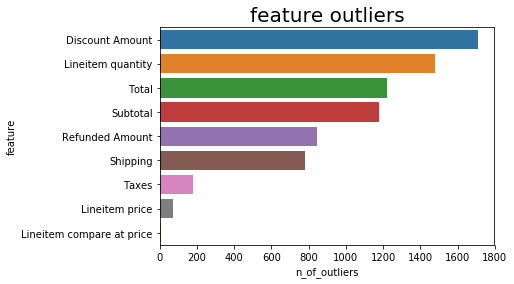

In [71]:
outliers(usjh1n)

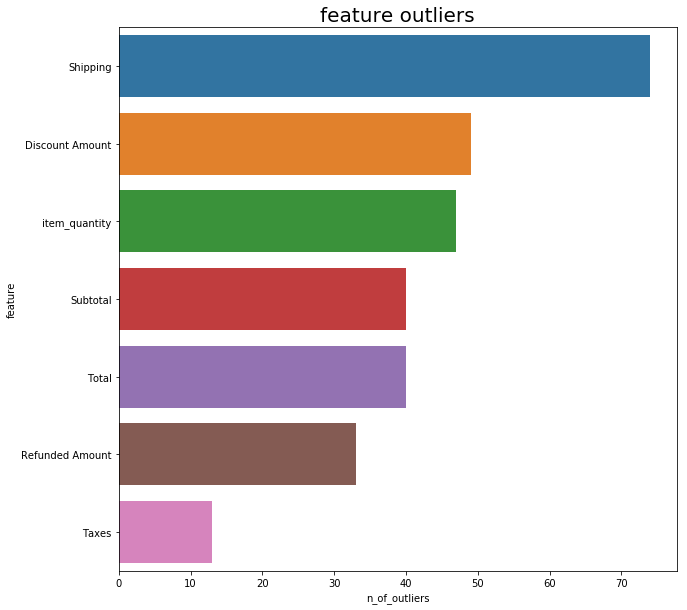

In [72]:
outliers(usjh2n)

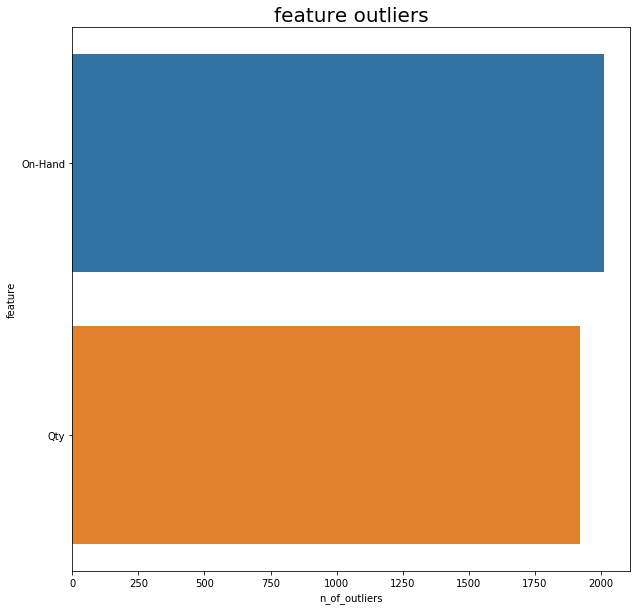

In [73]:
outliers(uno_in)

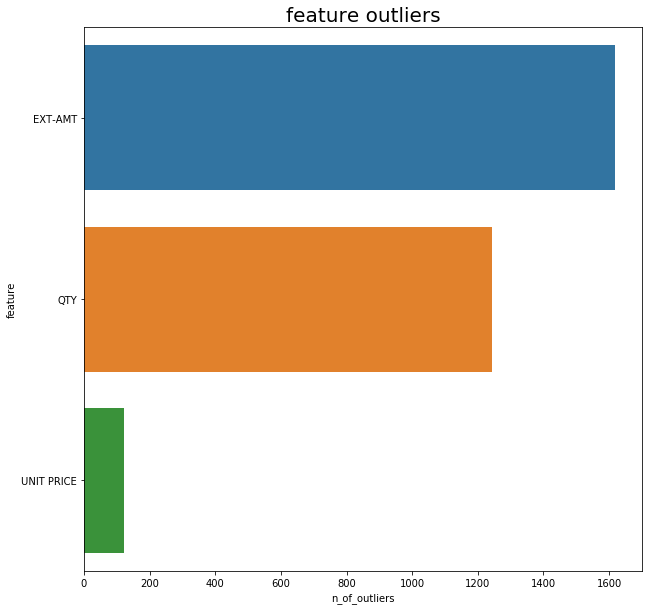

In [74]:
outliers(uno_sn)

<p><a name="correlation"></a></p>
## Correlation

In [75]:
def high_cor(df):
    dfc=df.corr()
    dfc=dfc.unstack()
    dfc=dfc.sort_values(ascending=False)
    dfc=pd.DataFrame(dfc)
    #dfc.columns=['correlation_coefficient']
    #dfc=dfc[dfc['correlation_coefficient']<1]
    #dfc=dfc.loc[::2]
    #dfc=dfc.iloc[::2]
    return dfc


In [76]:
usjh1n.corr()

,Subtotal,Shipping,Taxes,Total,Discount Amount,Lineitem quantity,Lineitem price,Lineitem compare at price,Refunded Amount
Subtotal,1.000000,0.069376,0.029115,0.999459,0.602661,0.417329,0.029240,-0.004284,0.740135
Shipping,0.069376,1.000000,0.021964,0.102123,0.155976,0.041783,-0.006102,-0.009941,0.032922
Taxes,0.029115,0.021964,1.000000,0.031198,0.052749,0.024703,0.005806,0.002327,0.058775
Total,0.999459,0.102123,0.031198,1.000000,0.606143,0.417544,0.028963,-0.004833,0.739183
Discount Amount,0.602661,0.155976,0.052749,0.606143,1.000000,0.280135,0.001746,-0.009248,0.244930
Lineitem quantity,0.417329,0.041783,0.024703,0.417544,0.280135,1.000000,-0.016306,-0.011822,0.229258
Lineitem price,0.029240,-0.006102,0.005806,0.028963,0.001746,-0.016306,1.000000,0.025997,-0.003880
Lineitem compare at price,-0.004284,-0.009941,0.002327,-0.004833,-0.009248,-0.011822,0.025997,1.000000,0.012855
Refunded Amount,0.740135,0.032922,0.058775,0.739183,0.244930,0.229258,-0.003880,0.012855,1.000000


In [77]:
usjh2n.corr()

,Subtotal,Shipping,Taxes,Total,Discount Amount,Refunded Amount,item_quantity
Subtotal,1.000000,0.006131,0.045439,0.999397,0.614678,0.612053,0.890931
Shipping,0.006131,1.000000,0.022011,0.040770,0.172594,-0.055402,0.025192
Taxes,0.045439,0.022011,1.000000,0.048280,0.057736,0.081008,0.019314
Total,0.999397,0.040770,0.048280,1.000000,0.620212,0.609750,0.891031
Discount Amount,0.614678,0.172594,0.057736,0.620212,1.000000,0.144788,0.604838
Refunded Amount,0.612053,-0.055402,0.081008,0.609750,0.144788,1.000000,0.593357
item_quantity,0.890931,0.025192,0.019314,0.891031,0.604838,0.593357,1.000000


In [78]:
uno_in.corr()

,Qty,On-Hand
Qty,1.000000,0.076622
On-Hand,0.076622,1.000000


In [79]:
uno_sn.corr()

,QTY,UNIT PRICE,EXT-AMT
QTY,1.000000,-0.054662,0.781491
UNIT PRICE,-0.054662,1.000000,0.119124
EXT-AMT,0.781491,0.119124,1.000000


<p><a name="vn"></a></p>
## Visulization

In [185]:
#this function includes skewness and correlation
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

def skewfunc(x, **kws):
    s=x.skew()
    ax = plt.gca()
    ax.annotate("skew = {:.2f}".format(s),
                xy=(.5, .9), xycoords=ax.transAxes)
    
def joint_plot(df):
    g = sns.PairGrid(df, palette=["red"])
    g.map_lower(plt.scatter, s=10)
    g.map_diag(sns.distplot, kde=False)
    g.map_diag(skewfunc)
    g.map_upper(corrfunc)
    g.map_upper(sns.regplot)

In [186]:
#sns.pairplot(usjh1n) has error 'max must be larger than min in range parameter'
#might be due to too many missing values

/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jialanzhu/ana

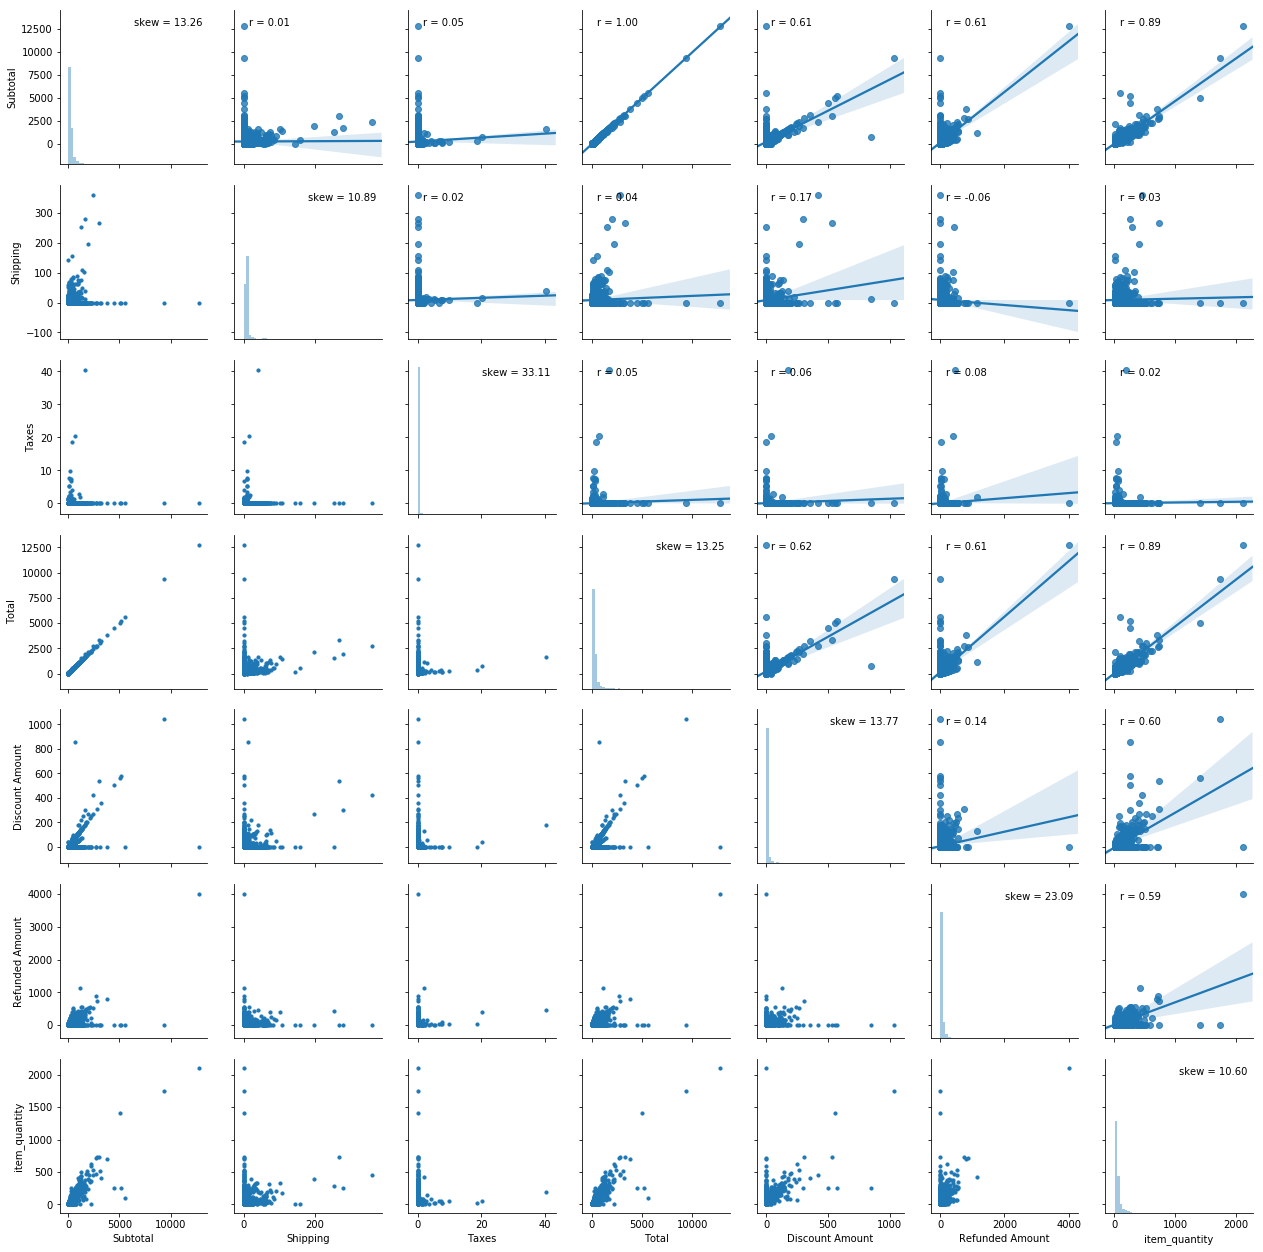

In [187]:
joint_plot(usjh2n)

/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


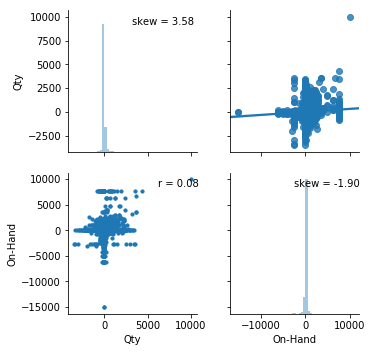

In [79]:
joint_plot(uno_in)

/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


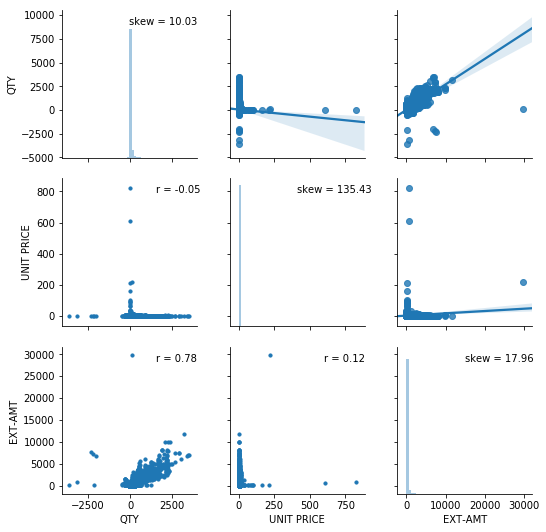

In [80]:
joint_plot(uno_sn)

<p><a name="cf"></a></p>
# 4. Explore categorical features

In [176]:
#create dataframe only consists of categorical features for each dataset
usjh1c=usjh_v1.select_dtypes(exclude='number')
usjh2c=usjh_v2.select_dtypes(exclude='number')
uno_ic=uno_inv.select_dtypes(exclude='number')
uno_sc=uno_sale.select_dtypes(exclude='number')
print(usjh1c.shape)
print(usjh2c.shape)
print(uno_ic.shape)
print(uno_sc.shape)

(85925, 32)
(3746, 27)
(144726, 7)
(111043, 17)


In [81]:
usjh1c.describe()

,Name,Financial Status,Paid at,Fulfillment Status,Accepts Marketing,Currency,Discount Code,Shipping Method,Created at,Lineitem name,Lineitem sku,Lineitem fulfillment status,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Notes,Note Attributes,Cancelled at,Payment Method,Vendor,Tags,Risk Level,Source,Lineitem name.1,Color,Unnamed: 39,Unnamed: 40
count,85925,85925,6936,81365,81365,81365,85925,81258,85925,85925,41272.0,85925,81224,81224,13768,81158,81211,81054,80219,81211,85925,85925,85925,81186,85790,85925,3746,3746,85925,75894,4782,144
unique,3746,4,984,3,2,1,39,29,3736,26556,19479.0,3,1564,1546,314,1484,1039,1123,59,18,248,2,54,8,140,5,3,4,10861,1551,298,24
top,#2726,partially_refunded,2017-11-17 21:33:00,partial,yes,USD,None,Free Shipping (Fedex Ground),2017-05-30 21:35:00,Urban Geometric Metal Hoop Earrings - Gold,11864.0,fulfilled,28 jfk blvd,1924 8th St NW,130,Violet Boutique,Miami,20001,NY,US,None,None,None,Shopify Payments,USJewelryhouse,None,Low,web,Urban Geometric Metal Hoop Earrings,Gold,Gold,Gold
freq,275,76118,185,69624,76889,81365,65979,47325,275,240,19.0,62639,835,1031,645,1230,2106,1086,11712,78034,79393,85922,85503,66080,26219,85846,3665,3663,650,11297,320,18
first,NaN,NaN,2015-11-03 16:22:00,NaN,NaN,NaN,NaN,NaN,2015-10-27 16:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-07-16 12:31:00,NaN,NaN,NaN,NaN,NaN,2018-07-16 12:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
usjh2c.describe()

,Name,Financial Status,Paid at,Fulfillment Status,Accepts Marketing,Currency,Discount Code,Shipping Method,Created at,Lineitem fulfillment status,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Notes,Note Attributes,Cancelled at,Payment Method,Vendor,Tags,Risk Level,Source,Color
count,3746,3746,984,3746,3746,3746,3746,3723,3746,3746,3739,3739,736,3734,3739,3732,3707,3739,3746,3746,3746,3746,3713,3746,3746,3746,3580
unique,3746,4,984,3,2,1,39,29,3736,3,1564,1546,314,1484,1039,1123,59,18,248,2,54,8,95,5,3,4,472
top,#4228,partially_refunded,2015-11-29 18:32:00,partial,yes,USD,None,FedEx Ground,2018-07-11 14:25:00,fulfilled,1600 Division Road,1239 Broadway,126 East State Street,Dazzle Candy,Philadelphia,10001,NY,US,None,None,None,Shopify Payments,USJewelryhouse,None,Low,web,Gold
freq,1,2653,1,2533,3511,3746,3339,2179,2,2790,35,37,17,32,85,53,618,3639,3482,3745,3690,2938,1279,3667,3665,3663,438
first,NaN,NaN,2015-11-03 16:22:00,NaN,NaN,NaN,NaN,NaN,2015-10-27 16:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-07-16 12:31:00,NaN,NaN,NaN,NaN,NaN,2018-07-16 12:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
uno_ic.describe()

,STYLE#,COLOR,Description,LAST RCVD,CB Reason
count,144726,136429,144710,144725,1
unique,6383,2306,6741,739,1
top,DTA6E2068,JET,3 TASSEL METAL HOOK ER,2017-12-21 00:00:00,SEED BEAD ANKLET_
freq,2168,7856,2054,1699,1
first,NaN,NaN,NaN,2016-01-04 00:00:00,NaN
last,NaN,NaN,NaN,2018-11-27 00:00:00,NaN


In [84]:
uno_sc.describe()

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED
count,111043,107062,111038,111043,111043,111043,111043,110962,111043,111043,111043,111043,111043,86553,86553,111043,111043
unique,5606,2734,6058,409,699,12,2,15,50,321,4,12,7,304,292,1,635
top,DTA6E2068,JET,"3"" TASSEL METAL HOOK ER",GOL001,2017-12-21 00:00:00,None,IMPORT,NOBLES,CA,90021,2017,2018 2ND,OLD,2018-10-02 00:00:00,2017-12-20 00:00:00,2018-10-03 00:00:00,2016-01-05 00:00:00
freq,1516,5872,1469,6722,1698,108415,90309,56730,20736,13830,32210,17778,43184,4145,1823,111043,5290
first,NaN,NaN,NaN,NaN,2016-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-04 00:00:00,2016-01-04 00:00:00,2018-10-03 00:00:00,2016-01-04 00:00:00
last,NaN,NaN,NaN,NaN,2018-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-02 00:00:00,2018-10-02 00:00:00,2018-10-03 00:00:00,2018-10-03 00:00:00


<p><a name="vc"></a></p>
## Visulization

In [177]:
#function returns the percentage of each item in a category
def uniq_count(df,feature):
    uniq_count = pd.DataFrame(pd.value_counts(df[feature]).sort_values(ascending=False)).reset_index()
    uniq_count.columns=[feature,'count']
    uniq_count['percentage %']=uniq_count['count']/df.shape[0]*100
        
    ax = sns.barplot(x="percentage %", y=feature, data=uniq_count)
    plt.rcParams['figure.figsize']=(10,10)


In [178]:
#select features what to explore in each dataset

In [179]:
usjh1c.columns

Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Accepts Marketing', 'Currency', 'Discount Code', 'Shipping Method',
       'Created at', 'Lineitem name', 'Lineitem sku',
       'Lineitem fulfillment status', 'Shipping Street', 'Shipping Address1',
       'Shipping Address2', 'Shipping Company', 'Shipping City',
       'Shipping Zip', 'Shipping Province', 'Shipping Country', 'Notes',
       'Note Attributes', 'Cancelled at', 'Payment Method', 'Vendor', 'Tags',
       'Risk Level', 'Source', 'Lineitem name.1', 'Color ', 'Unnamed: 39',
       'Unnamed: 40'],
      dtype='object')

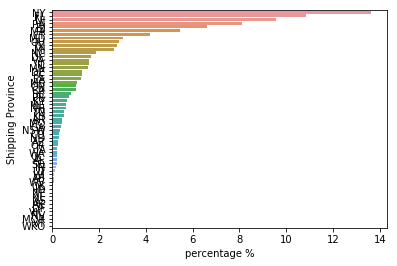

In [180]:
uniq_count(usjh1c,'Shipping Province')

In [181]:
usjh2c.columns

Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Accepts Marketing', 'Currency', 'Discount Code', 'Shipping Method',
       'Created at', 'Lineitem fulfillment status', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Notes', 'Note Attributes', 'Cancelled at',
       'Payment Method', 'Vendor', 'Tags', 'Risk Level', 'Source', 'Color '],
      dtype='object')

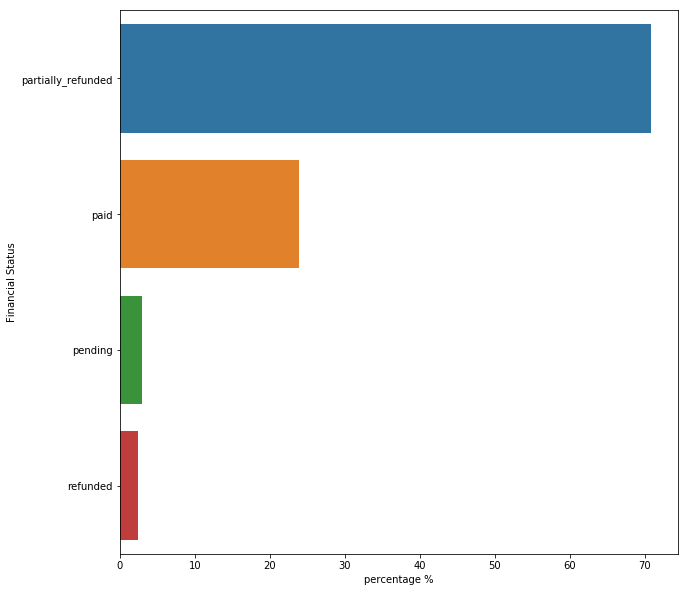

In [182]:
uniq_count(usjh2c,'Financial Status')

In [211]:
uno_ic.columns

Index(['STYLE#', 'COLOR', 'Description', 'LAST RCVD', 'CB Reason'], dtype='object')

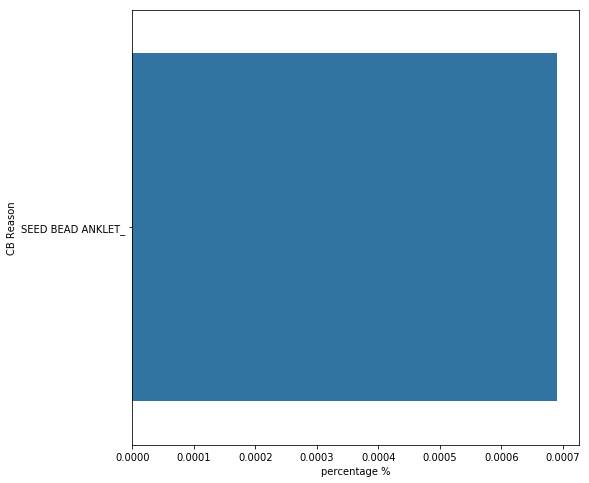

In [260]:
uniq_count(uno_ic,'CB Reason')

In [212]:
uno_sc.columns

Index(['STYLE#', 'COLOR', 'DESCRIPTION', 'CUST #', 'INVC DATE', 'REASON',
       'IMPORT HANDMADE', 'MANUFACTORS', 'State_sold', 'ZIP_sold',
       'RELEASED YEAR', 'Seasos', 'Season target', 'LAST RCVD', 'FIRST RCVD',
       'LAST INVOICED', 'FIRST INVOICED'],
      dtype='object')

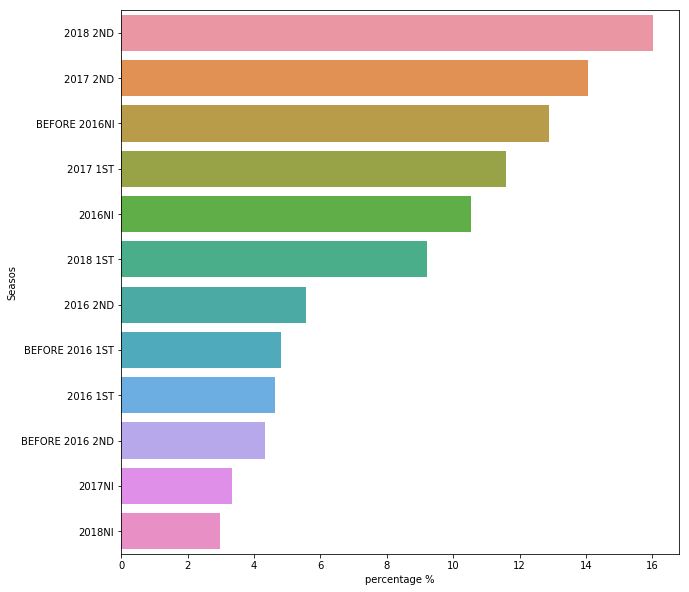

In [139]:
uniq_count(uno_sc,'Seasos')

<p><a name="ts"></a></p>
# 5.Time Series Analysis

In [233]:
#For numerical features
#input time and target feature, return the time series change of this feature
def time_n(df,target_time, target_feature, mode='year'):
    
    if mode=='year':
        df=df.groupby(df[target_time].dt.year)[target_feature].sum()
    elif mode=='month':
        df=df.groupby(df[target_time].dt.to_period('M'))[target_feature].sum()
    else:
        df=df.groupby(df[target_time])[target_feature].sum()
    
    df.plot()
    #plt.plot(df) if use this, error appears dont know why



#For categorical features
#input time and target feature's item, return the time series change of this item
def time_c(df,target_time, target_feature, value, mode='year'):
    df=df[df[target_feature]==value]
    
    if mode=='year':
        df=df.groupby(df[target_time].dt.year).size()
    elif mode=='month':
        df=df.groupby(df[target_time].dt.to_period('M')).size()
    else:
        df=df.groupby(df[target_time]).size()
                      
    df.plot(label=value)


In [190]:
usjh_v2.columns

Index(['Name', 'Financial Status', 'Paid at', 'Fulfillment Status',
       'Accepts Marketing', 'Currency', 'Subtotal', 'Shipping', 'Taxes',
       'Total', 'Discount Code', 'Discount Amount', 'Shipping Method',
       'Created at', 'Lineitem fulfillment status', 'Shipping Street',
       'Shipping Address1', 'Shipping Address2', 'Shipping Company',
       'Shipping City', 'Shipping Zip', 'Shipping Province',
       'Shipping Country', 'Notes', 'Note Attributes', 'Cancelled at',
       'Payment Method', 'Refunded Amount', 'Vendor', 'Tags', 'Risk Level',
       'Source', 'Color ', 'item_quantity'],
      dtype='object')

In [218]:
usjh_v2[pd.notna(usjh_v2['Cancelled at'])].shape

(56, 34)

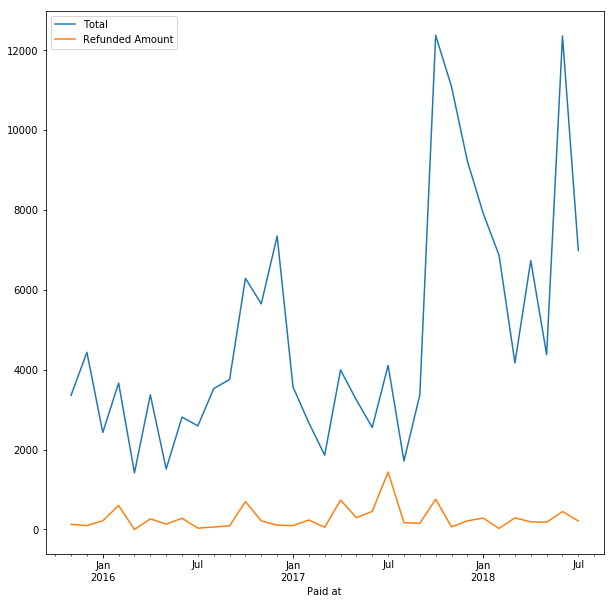

In [226]:
time_n(usjh_v2,'Paid at', ['Total','Refunded Amount'], 'month')

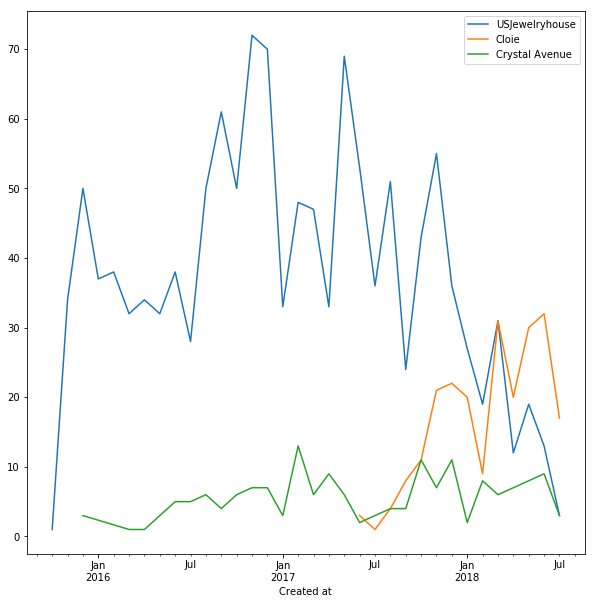

In [238]:
time_c(usjh_v2,'Created at', 'Vendor', 'USJewelryhouse', 'month')
time_c(usjh_v2,'Created at', 'Vendor', 'Cloie', 'month')
time_c(usjh_v2,'Created at', 'Vendor', 'Crystal Avenue', 'month')
plt.legend()

In [239]:
uno_sale.columns

Index(['STYLE#', 'COLOR', 'DESCRIPTION', 'CUST #', 'INVC DATE', 'QTY',
       'UNIT PRICE', 'EXT-AMT', 'REASON', 'IMPORT HANDMADE', 'MANUFACTORS',
       'State_sold', 'ZIP_sold', 'RELEASED YEAR', 'Seasos', 'Season target',
       'LAST RCVD', 'FIRST RCVD', 'LAST INVOICED', 'FIRST INVOICED'],
      dtype='object')

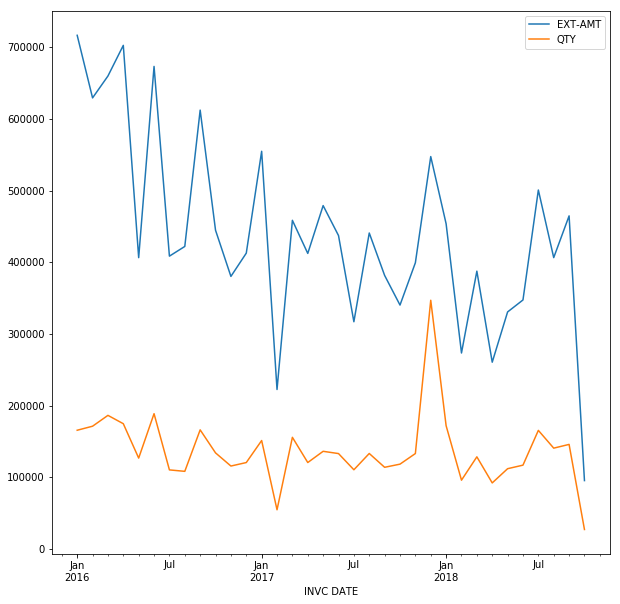

In [241]:
time_n(uno_sale,'INVC DATE', ['EXT-AMT','QTY'], 'month')

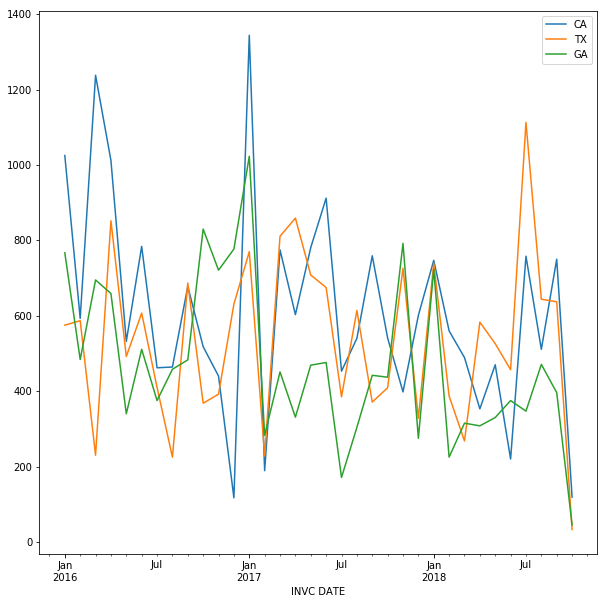

In [242]:
time_c(uno_sale,'INVC DATE', 'State_sold', 'CA', 'month')
time_c(uno_sale,'INVC DATE', 'State_sold', 'TX', 'month')
time_c(uno_sale,'INVC DATE', 'State_sold', 'GA', 'month')
plt.legend()

In [243]:
uno_inv.columns

Index(['STYLE#', 'COLOR', 'Description', 'LAST RCVD', 'Qty', 'On-Hand',
       'CB Reason'],
      dtype='object')

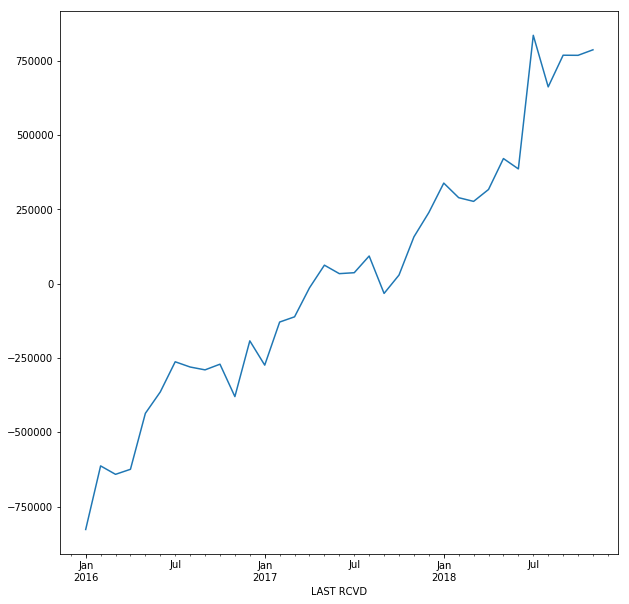

In [244]:
time_n(uno_inv,'LAST RCVD', 'On-Hand', 'month')

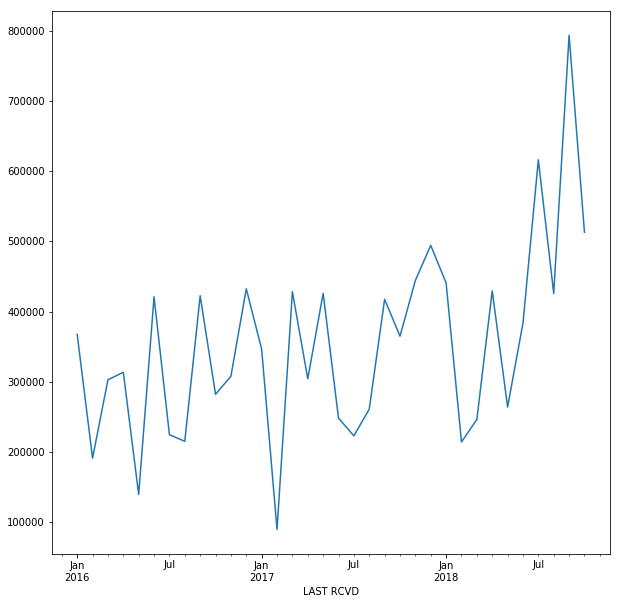

In [245]:
time_n(uno_sale,'LAST RCVD', 'EXT-AMT', 'month')

In [ ]:
#separate purchase and return

In [224]:
uno_sale

,STYLE#,COLOR,DESCRIPTION,CUST #,INVC DATE,QTY,UNIT PRICE,EXT-AMT,REASON,IMPORT HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED YEAR,Seasos,Season target,LAST RCVD,FIRST RCVD,LAST INVOICED,FIRST INVOICED
0,DTA1A9500,IV,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.00,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12,2016-04-12,2018-10-03,2016-04-12
1,DTA1A9500,MUL,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.00,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12,2016-04-12,2018-10-03,2016-04-12
2,DTA1A9500,TQ,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.00,None,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12,2016-04-12,2018-10-03,2016-04-12
3,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,CHE005,2016-05-20,12,3.25,39.00,None,IMPORT,NOBLES,LA,71235,2016,2016 1ST,SS16,2016-04-11,2016-04-04,2018-10-03,2016-04-04
4,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,GMA01,2016-08-22,24,3.25,78.00,None,IMPORT,NOBLES,0,0,2016,2016 1ST,SS16,2016-04-11,2016-04-04,2018-10-03,2016-04-04
5,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,HIS001,2016-08-03,12,3.25,39.00,None,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,2016-04-11,2016-04-04,2018-10-03,2016-04-04
6,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,HIS001,2016-08-25,-12,3.25,39.00,RETUR,IMPORT,NOBLES,CA,92821,2016,2016 1ST,SS16,2016-04-11,2016-04-04,2018-10-03,2016-04-04
7,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,PEN001,2016-04-04,12,3.25,39.00,None,IMPORT,NOBLES,VA,24522,2016,2016 1ST,SS16,2016-04-11,2016-04-04,2018-10-03,2016-04-04
8,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,STA002,2016-04-06,12,3.25,39.00,None,IMPORT,NOBLES,NY,10001,2016,2016 1ST,SS16,2016-04-11,2016-04-04,2018-10-03,2016-04-04
9,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,THE008,2016-04-12,240,3.25,780.00,None,IMPORT,NOBLES,MA,1720,2016,2016 1ST,SS16,2016-04-11,2016-04-04,2018-10-03,2016-04-04


In [225]:
missing_value(uno_sale)

Number of features with NAs: 5


,NAs,percentage
FIRST RCVD,24490,0.220545
LAST RCVD,24490,0.220545
COLOR,3981,0.035851
MANUFACTORS,81,0.000729
DESCRIPTION,5,0.000045


In [298]:
uno_sale.shape

(111043, 20)

In [299]:
#positive QTY is sale out
uno_saleout=uno_sale[uno_sale['QTY']>=0]

In [300]:
uno_saleout.shape

(108416, 20)

In [301]:
#negative QTY is return
uno_return=uno_sale[uno_sale['QTY']<0]

In [313]:
uno_return.shape

(123, 2)

In [314]:
#group by customer
uno_saleout=uno_saleout.groupby('CUST #')['EXT-AMT','QTY'].sum().reset_index()

In [315]:
uno_return=uno_return.groupby('CUST #')['EXT-AMT'].sum().reset_index()

In [316]:
#merge two data frames
uno_cust=pd.merge(uno_saleout, uno_return, how='left', on='CUST #').fillna(0)
uno_cust.columns=['cust_id', 'purchase', 'QTY','return']

In [317]:
uno_cust.head()

,cust_id,purchase,QTY,return
0,7HE001,26099.75,7546,1020.0
1,AAG001,18564.00,4200,0.0
2,ABC002,918.00,360,42.0
3,ABI001,393.00,180,0.0
4,ACC006,1638.00,432,0.0


In [318]:
#calculate return rate
uno_cust['returnr']=uno_cust['return']/uno_cust['purchase']

In [319]:
#calculate average item price for each customer
uno_cust['ave_price']=uno_cust['purchase']/uno_cust['QTY']

In [320]:
uno_cust=uno_cust.fillna(0)
missing_value(uno_cust)

Number of features with NAs: 0


,NAs,percentage


In [321]:
uno_cust.head()

,cust_id,purchase,QTY,return,returnr,ave_price
0,7HE001,26099.75,7546,1020.0,0.039081,3.458753
1,AAG001,18564.00,4200,0.0,0.000000,4.420000
2,ABC002,918.00,360,42.0,0.045752,2.550000
3,ABI001,393.00,180,0.0,0.000000,2.183333
4,ACC006,1638.00,432,0.0,0.000000,3.791667


In [322]:
#make it format for clustering
uno_cluster=uno_cust.drop(['cust_id','return','QTY','ave_price'], axis=1).values.tolist()

In [323]:
#make it format for clustering
uno_cluster_=uno_cust.drop(['cust_id','return','QTY','returnr'], axis=1).values.tolist()

In [245]:
sale=[sl[0] for sl in uno_cluster]
ret=[sl[1] for sl in uno_cluster]

In [327]:
sale_=[sl[0] for sl in uno_cluster_]
ret_=[sl[1] for sl in uno_cluster_]

In [246]:
#clustering
from sklearn.cluster import KMeans
kmeans = KMeans()

In [247]:
kmeans.set_params(n_clusters=3)
kmeans.fit(uno_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [248]:
kmeans.cluster_centers_

array([[1.68979142e+04, 1.42257010e-02],
       [1.50808508e+06, 2.21345452e-03],
       [7.21557657e+05, 1.01820116e-02]])

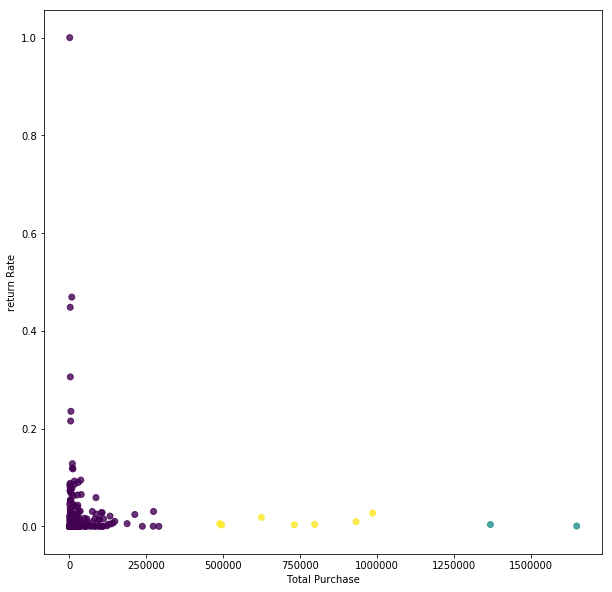

In [334]:
plt.scatter(sale, ret, c=kmeans.labels_, alpha=0.8)

plt.xlabel('Total Purchase')
plt.ylabel('return Rate')
plt.show()

In [325]:
kmeans_ = KMeans()
kmeans_.set_params(n_clusters=3)
kmeans_.fit(uno_cluster_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


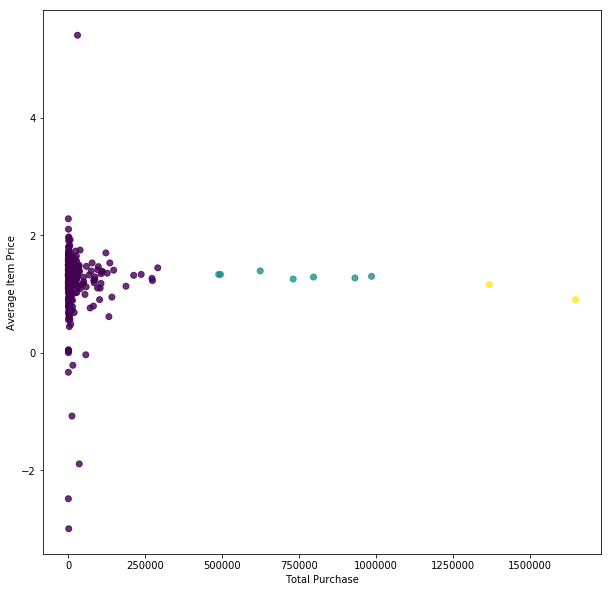

In [330]:
plt.scatter(sale_, np.log(ret_), c=kmeans_.labels_, alpha=0.8)

plt.xlabel('Total Purchase')
plt.ylabel('Average Item Price')
plt.show()

In [159]:
#USJH order create new column called value per item

In [195]:
usjh_v2.head()

,Name,Financial Status,Paid at,Fulfillment Status,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem fulfillment status,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Notes,Note Attributes,Cancelled at,Payment Method,Refunded Amount,Vendor,Tags,Risk Level,Source,Color,item_quantity
0,#1001,paid,2015-11-05 17:17:00,fulfilled,no,USD,33.25,10.00,1.55,44.80,None,0.00,Standard Shipping,2015-10-27 16:16:00,fulfilled,"1239 Broadway, FLR1",1239 Broadway,FLR1,US JEWELRY HOUSEW,New York,10001,NY,US,None,None,None,Cash on Delivery (COD),0.00,USJewelryhouse,None,Low,web,Tassel,7
1,#1002,refunded,2015-11-03 16:22:00,fulfilled,no,USD,7.65,6.89,0.00,14.54,Thankyou15,1.35,FedEx Ground,2015-11-03 16:22:00,fulfilled,"1239 Broadway, FLR1",1239 Broadway,FLR1,US JEWELRY HOUSEW,New York,10001,NY,US,Test order from George,None,None,Shopify Payments,14.54,USJewelryhouse,None,Low,web,Black,3
2,#1003,paid,2015-11-03 16:31:00,fulfilled,no,USD,6.37,6.89,0.00,13.26,thankyou15,1.13,FedEx Ground,2015-11-03 16:31:00,fulfilled,"1239 Broadway, FLR1",1239 Broadway,FLR1,US JEWELRY HOUSEW,New York,10001,NY,US,None,None,None,PayPal Express Checkout,0.00,USJewelryhouse,None,Low,web,Black,1
3,#1004,paid,2015-11-06 16:51:00,fulfilled,yes,USD,50.00,7.61,0.00,57.61,None,0.00,FedEx Ground,2015-11-06 16:51:00,fulfilled,"2800 Monticello Place, 23- 302",2800 Monticello Place,23- 302,La Bella Bijoux,Orlando,32835,FL,US,None,None,None,Shopify Payments,0.00,USJewelryhouse,None,Low,web,Torso,2
4,#1005,paid,2015-11-09 15:02:00,fulfilled,yes,USD,11.50,6.89,0.00,18.39,None,0.00,FedEx Ground,2015-11-06 18:09:00,fulfilled,"1239 Broadway, FLR1",1239 Broadway,FLR1,US JEWELRY HOUSEW,New York,10001,NY,US,None,None,None,Cash on Delivery (COD),0.00,USJewelryhouse,None,Low,web,Black,2


In [196]:
missing_value(usjh_v2)

Number of features with NAs: 12


,NAs,percentage
Shipping Address2,3010,0.803524
Paid at,2762,0.737320
Color,166,0.044314
Shipping Province,39,0.010411
Vendor,33,0.008809
Shipping Method,23,0.006140
Shipping Zip,14,0.003737
Shipping Company,12,0.003203
Shipping Street,7,0.001869
Shipping City,7,0.001869


In [197]:
usjh_order=usjh_v2[~usjh_v2['Shipping Company'].isnull()]

In [198]:
usjh_order.describe()

,Subtotal,Shipping,Taxes,Total,Discount Amount,Refunded Amount,item_quantity
count,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000,3734.000000
mean,262.276141,8.746481,0.053712,271.076334,7.007587,41.898725,50.660953
std,414.087506,14.337344,0.879304,414.463196,37.598150,92.088803,79.543179
min,1.990000,0.000000,0.000000,7.500000,0.000000,0.000000,1.000000
25%,82.312500,0.000000,0.000000,94.112500,0.000000,0.000000,14.000000
50%,176.005000,9.830000,0.000000,188.580000,0.000000,20.250000,32.000000
75%,305.000000,10.570000,0.000000,309.282500,0.000000,53.500000,61.000000
max,12770.250000,360.150000,40.470000,12770.250000,1039.800000,4003.340000,2112.000000


In [199]:
usjh_order['valueItem']=usjh_order['Total']/usjh_order['item_quantity']

/Users/jialanzhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [277]:
#return and sale
usjh_sr=usjh_order[['Total','Refunded Amount']]

In [278]:
#group by customer
usjh_sale=usjh_order.groupby('Shipping Company')['Total', 'item_quantity'].sum().reset_index()
usjh_return=usjh_order.groupby('Shipping Company')['Refunded Amount'].sum().reset_index()

In [279]:
#merge two data frames
usjh_cust=pd.merge(usjh_sale, usjh_return, how='left', on='Shipping Company').fillna(0)
usjh_cust.columns=['cust_id', 'purchase','QTY', 'return']

In [280]:
#calculate return rate
usjh_cust['returnr']=usjh_cust['return']/usjh_cust['purchase']

In [281]:
#calculate average item price for each customer
usjh_cust['ave_price']=usjh_cust['purchase']/usjh_cust['QTY']

In [283]:
#make it format for clustering
usjh_cluster=usjh_cust.drop(['cust_id','return','QTY','ave_price'], axis=1).values.tolist()

In [284]:
usjh_cluster

[[117.93, 0.13143390146697193],
 [462.07, 0.10604453870625663],
 [426.1, 0.28514433231635766],
 [460.97, 0.36282187561012647],
 [705.5, 0.0],
 [61.03, 0.5004096346059315],
 [94.54, 0.0],
 [251.8, 0.24809372517871325],
 [151.98, 0.0],
 [113.94, 0.17772511848341233],
 [612.75, 0.2525499796001632],
 [268.24, 0.12954816582165224],
 [1582.42, 0.20522364479720934],
 [2184.17, 0.14882999033957978],
 [4385.650000000001, 0.1855642835155564],
 [57.58, 0.0],
 [421.4, 0.0],
 [422.64, 0.20558868067385955],
 [4540.05, 0.2486382308564884],
 [166.15, 0.06470057177249473],
 [104.49, 0.2703608000765624],
 [994.81, 0.16566982639901087],
 [114.35, 0.03060778312199388],
 [785.31, 0.18309966764717117],
 [348.0, 0.20186781609195403],
 [110.79, 0.33116707284050906],
 [55.44, 1.0],
 [67.92, 0.0],
 [343.7, 0.0],
 [1763.6699999999998, 0.12442236926409136],
 [2848.0099999999998, 0.1215058935888568],
 [131.85, 0.09670079635949944],
 [823.67, 0.11290929619872037],
 [392.95, 0.24433133986512282],
 [607.9300000000001

In [285]:
usjh_cluster_=usjh_cust.drop(['cust_id','return','QTY','returnr'], axis=1).values.tolist()

In [286]:
usjh_cluster_

[[117.93, 5.127391304347826],
 [462.07, 3.9833620689655174],
 [426.1, 4.532978723404256],
 [460.97, 15.365666666666668],
 [705.5, 6.299107142857143],
 [61.03, 30.515],
 [94.54, 5.90875],
 [251.8, 5.722727272727273],
 [151.98, 75.99],
 [113.94, 9.495],
 [612.75, 3.5625],
 [268.24, 8.941333333333334],
 [1582.42, 7.258807339449541],
 [2184.17, 3.3654391371340524],
 [4385.650000000001, 3.3683947772657454],
 [57.58, 11.516],
 [421.4, 10.535],
 [422.64, 5.87],
 [4540.05, 3.8737627986348127],
 [166.15, 5.1921875],
 [104.49, 4.35375],
 [994.81, 27.633611111111108],
 [114.35, 5.197727272727272],
 [785.31, 3.966212121212121],
 [348.0, 5.612903225806452],
 [110.79, 6.517058823529412],
 [55.44, 2.772],
 [67.92, 6.174545454545455],
 [343.7, 2.203205128205128],
 [1763.6699999999998, 4.899083333333333],
 [2848.0099999999998, 4.535047770700636],
 [131.85, 6.2785714285714285],
 [823.67, 4.761098265895954],
 [392.95, 8.36063829787234],
 [607.9300000000001, 4.605530303030304],
 [2130.1, 6.594736842105263

In [287]:
sale1=[sl[0] for sl in usjh_cluster]
ret1=[sl[1] for sl in usjh_cluster]

In [294]:
sale1_=[sl[0] for sl in usjh_cluster_]
ret1_=[sl[1] for sl in usjh_cluster_]

In [289]:
kmeans1 = KMeans()
kmeans1.set_params(n_clusters=3)
kmeans1.fit(usjh_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [290]:
kmeans1.cluster_centers_

array([[4.06943144e+02, 1.69382022e-01],
       [1.27639357e+04, 9.63132133e-02],
       [3.53118058e+03, 1.54204608e-01]])

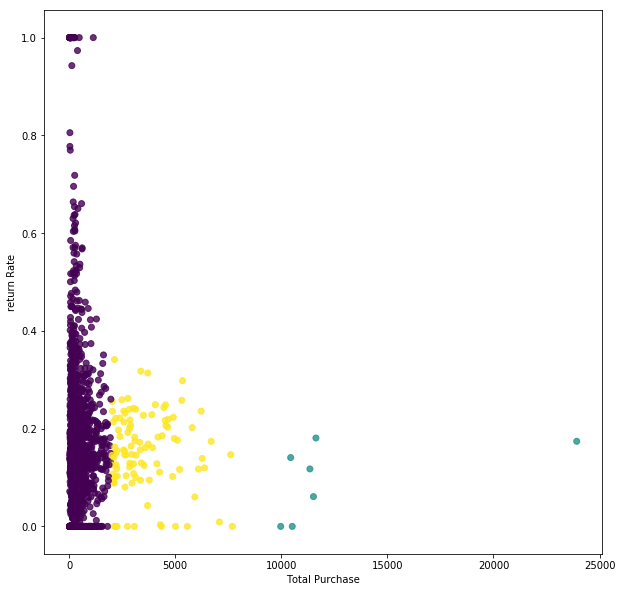

In [297]:
plt.scatter(sale1, ret1, c=kmeans1.labels_, alpha=0.8)

plt.xlabel('Total Purchase')
plt.ylabel('return Rate')
plt.show()

In [292]:
kmeans1_ = KMeans()
kmeans1_.set_params(n_clusters=3)
kmeans1_.fit(usjh_cluster_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

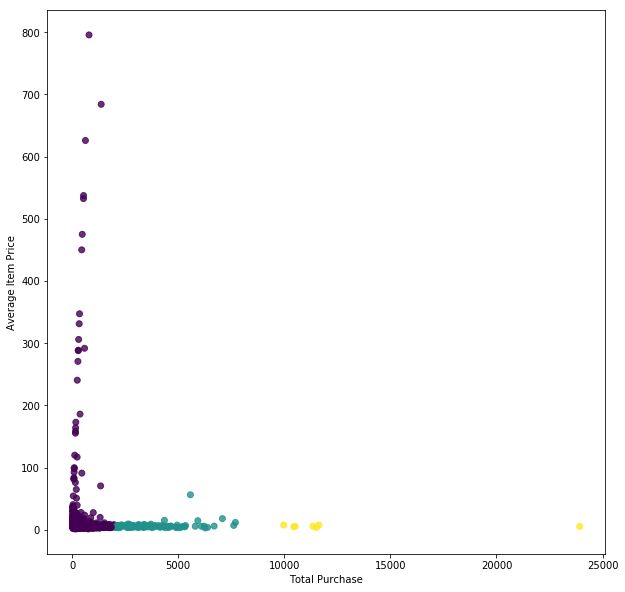

In [296]:
plt.scatter(sale1_, ret1_, c=kmeans1_.labels_, alpha=0.8)

plt.xlabel('Total Purchase')
plt.ylabel('Average Item Price')
plt.show()